# Efficient Coding Demonstrations

# This is the Algorithm (ICA) that is used to create the Receptive Fields

icatemp = sklearn.decomposition.FastICA(n_components=50) 
icafit = icatemp.fit(np.transpose(patches_mat))

ica_comp = icafit.components_

show_patches_mat(np.transpose(ica_comp), 25)

This chunk of code will be exactly the same across grayscale and color images; the only difference is a slight change of inputs.

# The following code defines functions for collecting and displaying patches for grayscale and color images

For these intents and purposes just run the code, no need to worry about the details of it, this will take some time to run


In [13]:
# packages used among several sections

import PIL.Image
import numpy as np
import pylab as py
import cv2
from PIL import Image
import sklearn.decomposition

In [14]:
#grayscale
def collect_natural_patches_g(num_patches = 100000, patch_width = 8):
  """ collects image patches
  the natural images are from a specific folder of 13 .tiff files"""

  max_tries = num_patches * 50
  image_width = 200
  
  img_first_patch = 0 # the first patch number accepted from an image
  img_first_try = 0 # the first attempt to take a patch from the image
  patch_cnt = 0 # number of collected patches
  try_cnt = 0 # number of attempted collected patches
  num_pixels = patch_width * patch_width

  patch_sample = np.zeros([patch_width,patch_width],float)
  patch = np.zeros([num_pixels,1],float)
  
  img_patches = np.zeros([num_pixels,num_patches],float)

  # change the image sampled from
  nat_img_cnt = 1  
  image = PIL.Image.open('natural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
  image = np.asarray(image, 'double').transpose()  

  # normalizing the image
  image -= image.mean()
  image /= image.std()
      
  # collect the patches
  while patch_cnt < num_patches and try_cnt < max_tries:
    try_cnt += 1  # number of total patches attempted

    if (try_cnt - img_first_try) > max_tries/13 or \
      (patch_cnt - img_first_patch) > num_patches/13:
      # change the image sampled from
      nat_img_cnt += 1
      image = PIL.Image.open('natural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
      image = np.asarray(image, 'double').transpose()        
      # normalizing the image
      image -= image.mean()
      image /= image.std()
      
      img_first_patch = patch_cnt
      img_first_try = try_cnt
    
      # update on every switch of images
      print (int(100 * float(patch_cnt)/num_patches),' percent complete')
    
    px = np.random.randint(0,image_width - patch_width)
    py = np.random.randint(0,image_width - patch_width)
        
    patch_sample = image[px:px+patch_width,py:py+patch_width].copy()
    patch_std = patch_sample.std()
    
    if patch_std > 0.0: # > 0 to remove blank/uninteresting patches for speed
      # create the patch vector     
      patch = np.reshape(patch_sample, num_pixels)     
      patch = patch - np.mean(patch)         
      img_patches[:,patch_cnt] = patch.copy()
      patch_cnt += 1
  return img_patches
        
patches_mat_g = collect_natural_patches_g(num_patches = 100000, patch_width = 8)
print('\nshape of the extracted image patch data:', patches_mat.shape)



#color
def collect_natural_patches_c(num_patches = 100000, patch_width = 8):
  """ collects image patches
  the natural images are from a specific folder of 13 .tiff files"""

  max_tries = num_patches * 50
  image_width = 200
  
  img_first_patch = 0 # the first patch number accepted from an image
  img_first_try = 0 # the first attempt to take a patch from the image
  patch_cnt = 0 # number of collected patches
  try_cnt = 0 # number of attempted collected patches
  num_pixels = 3 * patch_width * patch_width

  patch_sample = np.zeros([3,patch_width,patch_width],float)
  patch = np.zeros([num_pixels],float)
  
  img_patches = np.zeros([num_pixels,num_patches],float)

  # change the image sampled from
  nat_img_cnt = 1  
  image = PIL.Image.open('natural_color/' + str(nat_img_cnt) + '.tiff')
  image = np.asarray(image, 'double').transpose() 
  image = image[0:3,:,:]
  # normalizing the image
  image -= image.mean()
  image /= image.std()
  
  
  # collect the patches
  while patch_cnt < num_patches and try_cnt < max_tries:
    try_cnt += 1  # number of total patches attempted

    if (try_cnt - img_first_try) > max_tries/5 or \
      (patch_cnt - img_first_patch) > num_patches/5:
      # change the image sampled from
      nat_img_cnt += 1
      image = PIL.Image.open('natural_color/' + str(nat_img_cnt) + '.tiff')
      
      image = np.asarray(image, 'double').transpose() 
      image = image[0:3,:,:]
      
      
      
      image -= image.mean()
      image /= image.std()
      
      img_first_patch = patch_cnt
      img_first_try = try_cnt
    
      # update on every switch of images
      print (int(100 * float(patch_cnt)/num_patches),' percent complete')
    
    px = np.random.randint(0,image_width - patch_width)
    py = np.random.randint(0,image_width - patch_width)
        
    patch_sample = image[:,px:px+patch_width,py:py+patch_width].copy()
    
    patch_std = patch_sample.std()
    
    if patch_std > 0.0: # > 0 to remove blank/uninteresting patches for speed
      # create the patch vector     
      patch = np.reshape(patch_sample, num_pixels)   
      patch = patch - np.mean(patch)         
      img_patches[:,patch_cnt] = patch.copy()
      patch_cnt += 1
  return img_patches
        
patches_mat_c = collect_natural_patches_c(num_patches = 100000, patch_width = 8)
print('\nshape of the extracted image patch data:', patches_mat.shape)



def show_patches_mat_g(pre_patches, show_patch_num = 16, display=True):
  """ this function generates a 2D array to display image patches (assuming square) """
  
  patches = pre_patches
    
  tot_patches = patches.shape[1]
  data_dim = patches.shape[0]
  patch_width = int(np.round(np.sqrt(data_dim)))
  
  # extract show_patch_num patches
  disp_patch = np.zeros([data_dim, show_patch_num], float)
  for i in range(0,show_patch_num):
    patch_i = i * tot_patches // show_patch_num
  
    patch = patches[:,patch_i].copy()
    pmax  = patch.max()
    pmin = patch.min()
    # fix patch range from min to max to 0 to 1
    if pmax > pmin: 
      patch = (patch - pmin) / (pmax - pmin)
    disp_patch[:,i] = patch.copy()

  bw = 5    # border width
  pw = patch_width
  
  patches_y = int(np.sqrt(show_patch_num))
  patches_x = int(np.ceil(float(show_patch_num) / patches_y))
  patch_img = disp_patch.max() * np.ones([(pw + bw) * patches_x - bw,
    patches_y * (pw + bw) - bw], float)
  for i in range(0,show_patch_num): 
    y_i = i // patches_y
    x_i = i % patches_y
    
    reshaped = disp_patch[:,i].reshape((pw,pw))
    full_patch = np.zeros([pw, pw], float)
    full_patch[0:pw,:] = reshaped[:,:].copy()
    patch_img[x_i*(pw+bw):x_i*(pw+bw)+pw,y_i*(pw+bw):y_i*(pw+bw)+pw] = full_patch
  
  if display:
    py.bone()
    py.imshow(patch_img.T, interpolation='nearest')
    py.axis('off')
  return






def show_patches_mat_c(pre_patches, show_patch_num = 16, display=True):
  """ this function generates a 2D array to display image patches (assuming square) """
  
  patches = pre_patches
    
  tot_patches = patches.shape[1]
  data_dim = patches.shape[0]
  patch_width = int(np.round(np.sqrt(data_dim))) - 6
  
  # extract show_patch_num patches
  disp_patch = np.zeros([data_dim, show_patch_num], float)
  for i in range(0,show_patch_num):
    patch_i = i * tot_patches // show_patch_num
  
    patch = patches[:,patch_i].copy()
    pmax  = patch.max()
    pmin = patch.min()
    # fix patch range from min to max to 0 to 1
    if pmax > pmin: 
      patch = (patch - pmin) / (pmax - pmin)
    disp_patch[:,i] = patch.copy()

  bw = 5    # border width
  pw = patch_width
  
  patches_y = int(np.sqrt(show_patch_num))
  patches_x = int(np.ceil(float(show_patch_num) / patches_y))
  patch_img = disp_patch.max() * np.ones([3,(pw + bw) * patches_x - bw,
    patches_y * (pw + bw) - bw], float)
  for i in range(0,show_patch_num): 
    y_i = i // patches_y
    x_i = i % patches_y 

    reshaped = disp_patch[:,i].reshape((3,8,8))
    full_patch = np.zeros([3, pw, pw], float)
    full_patch[0:3,0:8,0:8] = reshaped[:,:,:].copy()
    patch_img[:,x_i*(pw+bw):x_i*(pw+bw)+pw,y_i*(pw+bw):y_i*(pw+bw)+pw] = full_patch
  
  if display:
    
    py.imshow(patch_img[:,:,:].T, interpolation='nearest')
    py.axis('off')
  return

7  percent complete
15  percent complete
23  percent complete
30  percent complete
38  percent complete
46  percent complete
53  percent complete
61  percent complete
69  percent complete
76  percent complete
84  percent complete
92  percent complete

shape of the extracted image patch data: (192, 100000)
20  percent complete
40  percent complete
60  percent complete
80  percent complete

shape of the extracted image patch data: (192, 100000)


# Now we can take a look at some of the 8x8 pixel patches we collected from our images

First lets take a look at some of our grayscale images

7  percent complete
15  percent complete
23  percent complete
30  percent complete
38  percent complete
46  percent complete
53  percent complete
61  percent complete
69  percent complete
76  percent complete
84  percent complete
92  percent complete


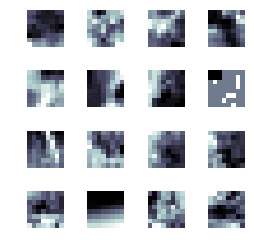

In [15]:
collect_natural_patches_g(num_patches = 100000, patch_width = 8)
show_patches_mat_g(patches_mat_g)

Now lets look at some color images

20  percent complete
40  percent complete
60  percent complete
80  percent complete


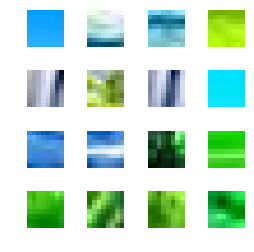

In [16]:
collect_natural_patches_c(num_patches = 100000, patch_width = 8)
show_patches_mat_c(patches_mat_c)

# To Produce filters for grayscale and color images we can take the patches we just generated and run them through ICA algorithm which we saw at the top of the notebook

It is important to note that ICA works the same for both forms of input

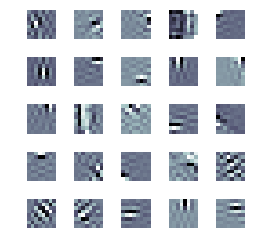

In [20]:
icatemp_g = sklearn.decomposition.FastICA(n_components=50) # note, sensitive to n_components
icafit_g = icatemp_g.fit(np.transpose(patches_mat_g))

ica_comp_g = icafit_g.components_

# print('shape of the ica component matrix: ',ica_comp.shape)

show_patches_mat_g(np.transpose(ica_comp_g), 25)

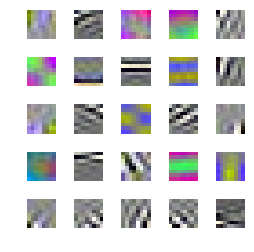

In [22]:
icatemp_c = sklearn.decomposition.FastICA(n_components=50) # note, sensitive to n_components
icafit_c = icatemp_c.fit(np.transpose(patches_mat_c))

ica_comp_c = icafit_c.components_

show_patches_mat_c(np.transpose(ica_comp_c), 25)